# DeciosnTreeModel To Detect FraduCards

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_781b004b54474bea30ee7e26faffc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_781b004b54474bea30ee7e26faffc.get_object(Bucket='creditcardfrauddetection-donotdelete-pr-hpiixlza7mj',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import os

In [4]:
np.random.seed(2)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data Processing

## Scale Data

In [7]:
scaler = StandardScaler()
df_data_1['NormalizedAmount'] = scaler.fit_transform(df_data_1['Amount'].values.reshape(-1,1))
df_data_1.drop(['Amount'],inplace=True,axis = 1)

## Split Data

In [8]:
df_data_1.drop(['Time'],inplace=True,axis = 1)

In [9]:
X = df_data_1['Class']
Y = df_data_1.drop(['Class'],axis = 1)

In [11]:
X.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state = 0)

In [14]:
Y_train.shape, Y_test.shape

((213605, 29), (71202, 29))

# Fit the Model with decisionTreeClasssifier

In [16]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(Y_train, X_train)

DecisionTreeClassifier()

## Evaluation

In [17]:
x_pred = dec_tree.predict(Y_test) 

In [18]:
dec_tree.score(Y_test, X_test)

0.9991292379427544

In [46]:
def plotting_confusion_matrix(cm, classes, normalize = False,title = 'Confusion Matrix',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
        print("Normalized")
    else:
        print("Confusion Matrix, Without Normalization ")
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    
    formt = '.2f' if normalize else 'd'
    threshold = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], formt),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > threshold else "Blue")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

In [47]:
cm = confusion_matrix(X_test, x_pred.round())
print(cm)

[[71050    32]
 [   30    90]]


In [48]:
print(accuracy_score(X_test, x_pred.round()))
print(precision_score(X_test, x_pred.round()))
print(recall_score(X_test, x_pred.round()))
print(f1_score(X_test, x_pred.round()))

0.9991292379427544
0.7377049180327869
0.75
0.743801652892562


Confusion Matrix, Without Normalization 


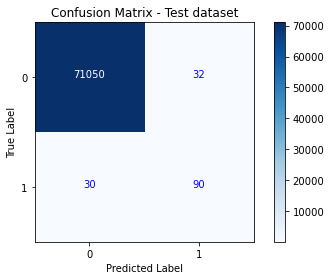

In [49]:
plotting_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')